## Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.preprocessing import OneHotEncoder

### Importamos los datos originales y agregamos el label

In [2]:
df_train_values = pd.read_csv('./../datasets/train_values.csv')
df_train_labels = pd.read_csv('./../datasets/train_labels.csv')

In [3]:
df_train_values.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### Pre_procesamiento de datos

#### Quitamos 'geo_level_2_id' y 'geo_level_3_id'

In [5]:
RF_train_values = df_train_values.drop(['geo_level_2_id', 'geo_level_3_id'], axis=1)

In [6]:
RF_train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 37 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   count_floors_pre_eq                     260601 non-null  int64 
 3   age                                     260601 non-null  int64 
 4   area_percentage                         260601 non-null  int64 
 5   height_percentage                       260601 non-null  int64 
 6   land_surface_condition                  260601 non-null  object
 7   foundation_type                         260601 non-null  object
 8   roof_type                               260601 non-null  object
 9   ground_floor_type                       260601 non-null  object
 10  other_floor_type                        260601 non-null 

#### Pasamos 'geo_level_1_id' a Category y realizamos One-Hot Encoding de los datos de tipo category y object

In [7]:
RF_train_values['geo_level_1_id'] = pd.Categorical(RF_train_values['geo_level_1_id'])

In [8]:
RF_train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 37 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  category
 2   count_floors_pre_eq                     260601 non-null  int64   
 3   age                                     260601 non-null  int64   
 4   area_percentage                         260601 non-null  int64   
 5   height_percentage                       260601 non-null  int64   
 6   land_surface_condition                  260601 non-null  object  
 7   foundation_type                         260601 non-null  object  
 8   roof_type                               260601 non-null  object  
 9   ground_floor_type                       260601 non-null  object  
 10  other_floor_type                

In [9]:
RF_train_values = pd.get_dummies(RF_train_values)

In [10]:
RF_train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 97 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   count_floors_pre_eq                     260601 non-null  int64
 2   age                                     260601 non-null  int64
 3   area_percentage                         260601 non-null  int64
 4   height_percentage                       260601 non-null  int64
 5   has_superstructure_adobe_mud            260601 non-null  int64
 6   has_superstructure_mud_mortar_stone     260601 non-null  int64
 7   has_superstructure_stone_flag           260601 non-null  int64
 8   has_superstructure_cement_mortar_stone  260601 non-null  int64
 9   has_superstructure_mud_mortar_brick     260601 non-null  int64
 10  has_superstructure_cement_mortar_brick  260601 non-null  int64
 11  

#### Agragamos el label

In [11]:
RF_train_values = RF_train_values.merge(df_train_labels)

In [12]:
RF_train_values.head(2)

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,...,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,damage_grade
0,802906,2,30,6,5,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,3
1,28830,2,10,8,7,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,2


#### Quitamos el feature 'building_id'

In [13]:
RF_train_values = RF_train_values.iloc[:,1:]

In [14]:
RF_train_values.head(2)

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,damage_grade
0,2,30,6,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
1,2,10,8,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2


#### Separamos la variable a predecir

In [15]:
X, y = RF_train_values.iloc[:,:-1],RF_train_values.iloc[:,-1]

In [16]:
X.head(2)

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,2,30,6,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,10,8,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
y.head(2)

0    3
1    2
Name: damage_grade, dtype: int64

#### Separamos el set train - test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Creamos el modelo

In [19]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

#### Métrica f1_micro de entrenamiento (con cross validation)

In [20]:
scores=cross_val_score(rf_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6702609363008443

#### Métrica f1_micro de test

In [21]:
f1_score(y_test, preds, average='micro')

0.6690969091153278

### Importancia de los features

In [22]:
# Gini importance
rf_model.feature_importances_

array([2.02024690e-02, 1.82774328e-01, 1.82861846e-01, 9.06120960e-02,
       8.88992391e-03, 1.57278465e-02, 6.85464396e-03, 4.09826494e-03,
       7.22953968e-03, 9.43766029e-03, 1.84782153e-02, 9.04584823e-03,
       5.84425574e-03, 3.01877916e-03, 4.47029687e-03, 3.34429323e-02,
       8.42568040e-03, 5.45181082e-03, 4.27615574e-03, 1.50935498e-03,
       2.77176339e-04, 1.22749738e-04, 4.13639064e-04, 6.32011652e-05,
       4.68960852e-05, 3.34881836e-05, 1.25428359e-03, 2.50842063e-03,
       1.96794829e-03, 8.52742154e-04, 3.18474157e-03, 5.85145216e-03,
       2.40902908e-03, 6.63161936e-03, 6.11273098e-03, 1.14500409e-02,
       2.55251368e-03, 7.01576373e-03, 3.84971638e-03, 1.49977920e-03,
       5.55491762e-03, 1.37318435e-03, 1.22283528e-03, 2.13017177e-03,
       6.65108228e-02, 8.04404857e-03, 4.39856570e-04, 5.89901823e-03,
       1.30632803e-02, 3.46342985e-03, 8.53882536e-04, 1.21268788e-03,
       3.46747741e-03, 1.34593286e-02, 8.18960455e-03, 3.74625424e-04,
      

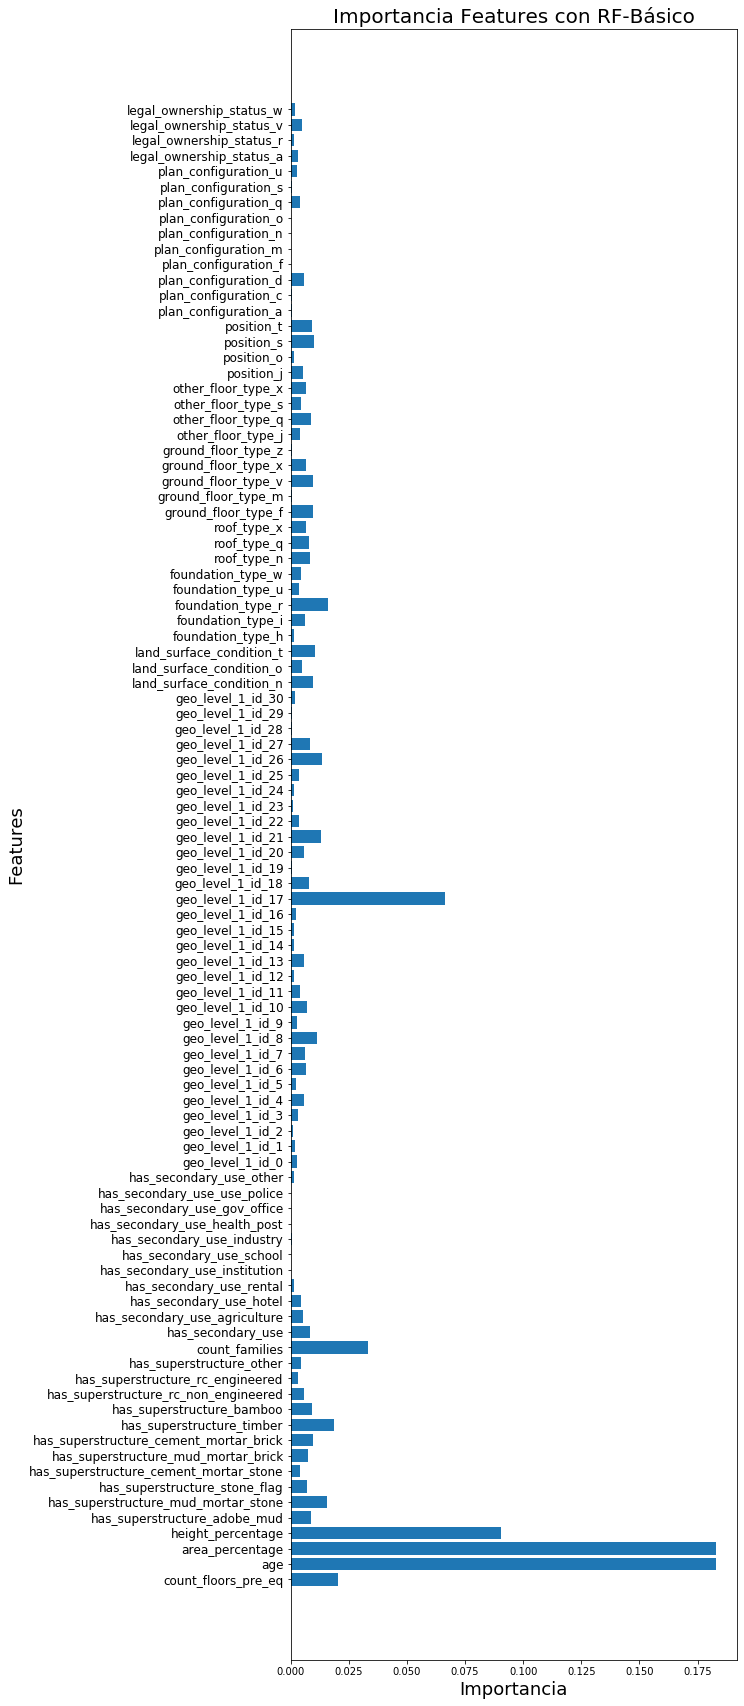

In [23]:
plt.figure(figsize=(8,30))
plt.barh(X_train.columns, rf_model.feature_importances_)
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Básico',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

#### Ordenamos los features para mejorar la visualización

In [24]:
Grafico_fi = pd.DataFrame()
Grafico_fi['Features']=X_train.columns
Grafico_fi['Importancia']=rf_model.feature_importances_

In [25]:
Grafico_fi = Grafico_fi.sort_values('Importancia',ascending=True)

In [26]:
Grafico_fi.head(2)

,Features,Importancia
85,plan_configuration_f,0.000025
25,has_secondary_use_use_police,0.000033


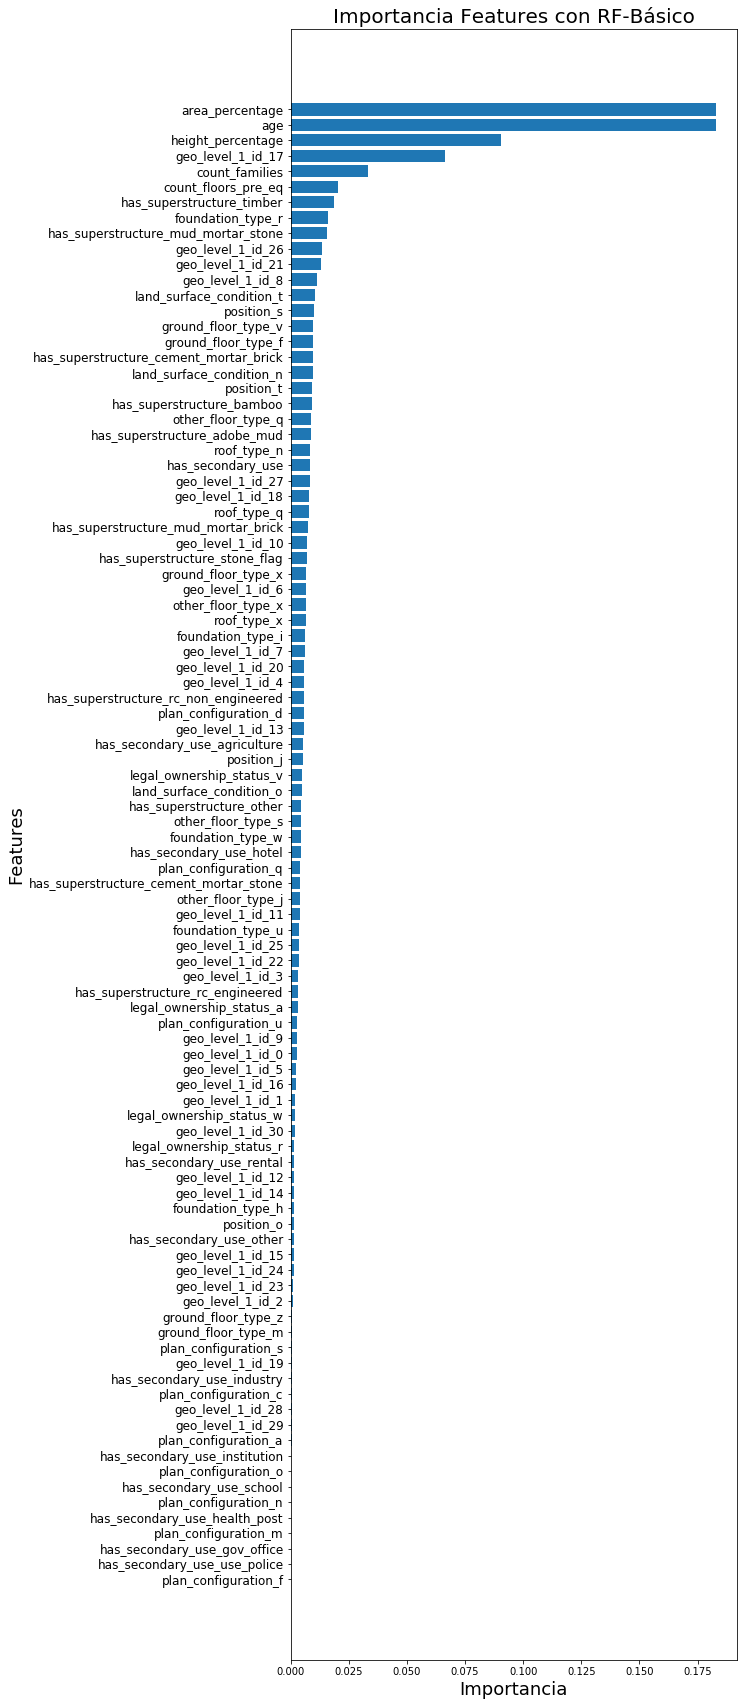

In [27]:
plt.figure(figsize=(8,30))
plt.barh(Grafico_fi['Features'], Grafico_fi['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Básico',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

#### Nos quedamos con los 25 más importantes

In [28]:
Grafico_fi_top = Grafico_fi.iloc[-25:,:]

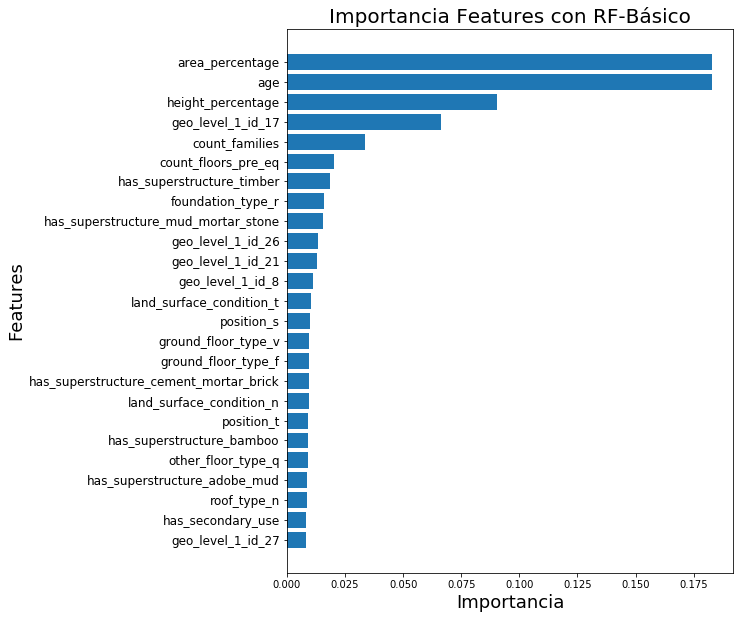

In [29]:
plt.figure(figsize=(8,10))
plt.barh(Grafico_fi_top['Features'], Grafico_fi_top['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Básico',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

### Busqueda de Hiper-parámetros

#### Hiper_paramétros que vamos a optimizar
*   **n_estimators**: cantidad de árboles a construir (100)
*   **max_depth**: máxima profundidad de cada árbol
*   **min_samples_split**: la cantidad mínima de datos requeridos para splitear un nodo interno (2)
*   **min_samples_leaf**: cantidad mínima de datos requeridos para ser una hoja (1)
*   **max_features**: la cantidad de features a considerar cuando se busca el mejor split (n)



In [30]:
parameters_grid = {'n_estimators':[50,100,150],
                   'max_depth':[1,2,3,4,5],
                   'min_samples_leaf':[1,2,3,4,5],
                   'min_samples_split':[1,2,3,4,5],
                   'criterion':['gini','entropy']   }
#max_features: la cantidad de features a considerar cuando se busca el mejor split (n)

In [150]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)

In [151]:
fit_rs = rs.fit(X_train, y_train)

In [33]:
print(fit_rs.cv_results_['mean_test_score'])

[       nan 0.56941673 0.56941673 0.63293361        nan]


In [34]:
fit_rs.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'gini'}

In [35]:
best_model= fit_rs.best_estimator_

In [36]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=50,
                       random_state=1)

In [37]:
print('Train: ',best_model.score(X_train, y_train))
print('Test: ',best_model.score(X_test, y_test))

Train:  0.633096699923254
Test:  0.6296502369486388


In [38]:
preds = best_model.predict(X_test)

#### Métrica f1_micro de entrenamiento (con cross validation)

In [39]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6329336147352265

#### Métrica f1_micro de test

In [40]:
f1_score(y_test, preds, average='micro')

0.6296502369486388

#### Ajuste_1 de Hiper-parámetros y validación

In [41]:
parameters_grid = {'n_estimators':[50,100,150],
                   'max_depth':[5,10,15],
                   'min_samples_leaf':[3,4,5],
                   'min_samples_split':[5,10,15],  }

In [42]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 3,
 'max_depth': 15}

In [43]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [44]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6779163468917881

In [45]:
f1_score(y_test, preds, average='micro')

0.6766754283302315

#### Ajuste_2 de Hiper-parámetros y validación

In [46]:
parameters_grid = {'n_estimators':[80,100,120],
                   'max_depth':[12,15,20],
                   'min_samples_leaf':[2,3,4],
                   'min_samples_split':[8,10,12],  }

In [47]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_depth': 20}

In [48]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [49]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6859027244819647

In [50]:
f1_score(y_test, preds, average='micro')

0.6841963891713513

#### Ajuste_3 de Hiper-parámetros y validación

In [51]:
parameters_grid = {'n_estimators':[70,80,90],
                   'max_depth':[20,25,30],
                   'min_samples_leaf':[3],
                   'min_samples_split':[7,8,9] }

In [52]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 70,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [53]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [54]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6954336147352265

In [55]:
f1_score(y_test, preds, average='micro')

0.6937702653441031

#### Ajuste_4 de Hiper-parámetros y validación

In [56]:
parameters_grid = {'n_estimators':[75,80,85],
                   'max_depth':[23,25,27],
                   'min_samples_leaf':[3],
                   'min_samples_split':[6,7,8] }

In [57]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 85,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 27}

In [58]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [59]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.693989831158864

In [60]:
f1_score(y_test, preds, average='micro')

0.6915638610157134

#### Ajuste_5 de Hiper-parámetros y validación

In [61]:
parameters_grid = {'n_estimators':[73,75,77],
                   'max_depth':[24,25,26],
                   'min_samples_leaf':[3],
                   'min_samples_split':[5,6] }

In [62]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 75,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 26}

In [63]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [64]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6932175748273216

In [65]:
f1_score(y_test, preds, average='micro')

0.6915063026419294

#### Ajuste_6 de Hiper-parámetros y validación

In [66]:
parameters_grid = {'n_estimators':[76,77,78],
                   'max_depth':[25,26,27],
                   'min_samples_leaf':[3],
                   'min_samples_split':[5,6,7] }

In [67]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 78,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 27}

In [68]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [69]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6939994244052187

In [70]:
f1_score(y_test, preds, average='micro')

0.6911417662746302

#### Ajuste_7 de Hiper-parámetros y validación

In [71]:
parameters_grid = {'n_estimators':[77,78,79],
                   'max_depth':[26,27,28],
                   'min_samples_leaf':[3],
                   'min_samples_split':[4,5,6] }

In [72]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 78,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 28}

In [73]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [74]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6943495778971605

In [75]:
f1_score(y_test, preds, average='micro')

0.6919667696322019

### Importancia de los features del mejor modelo hallado

#### Ordenamos los features para mejorar la visualización

In [76]:
Grafico_fi2 = pd.DataFrame()
Grafico_fi2['Features']=X_train.columns
Grafico_fi2['Importancia']=best_model.feature_importances_
Grafico_fi2 = Grafico_fi2.sort_values('Importancia',ascending=True)
Grafico_fi2.head(2)

,Features,Importancia
25,has_secondary_use_use_police,0.0
85,plan_configuration_f,0.0


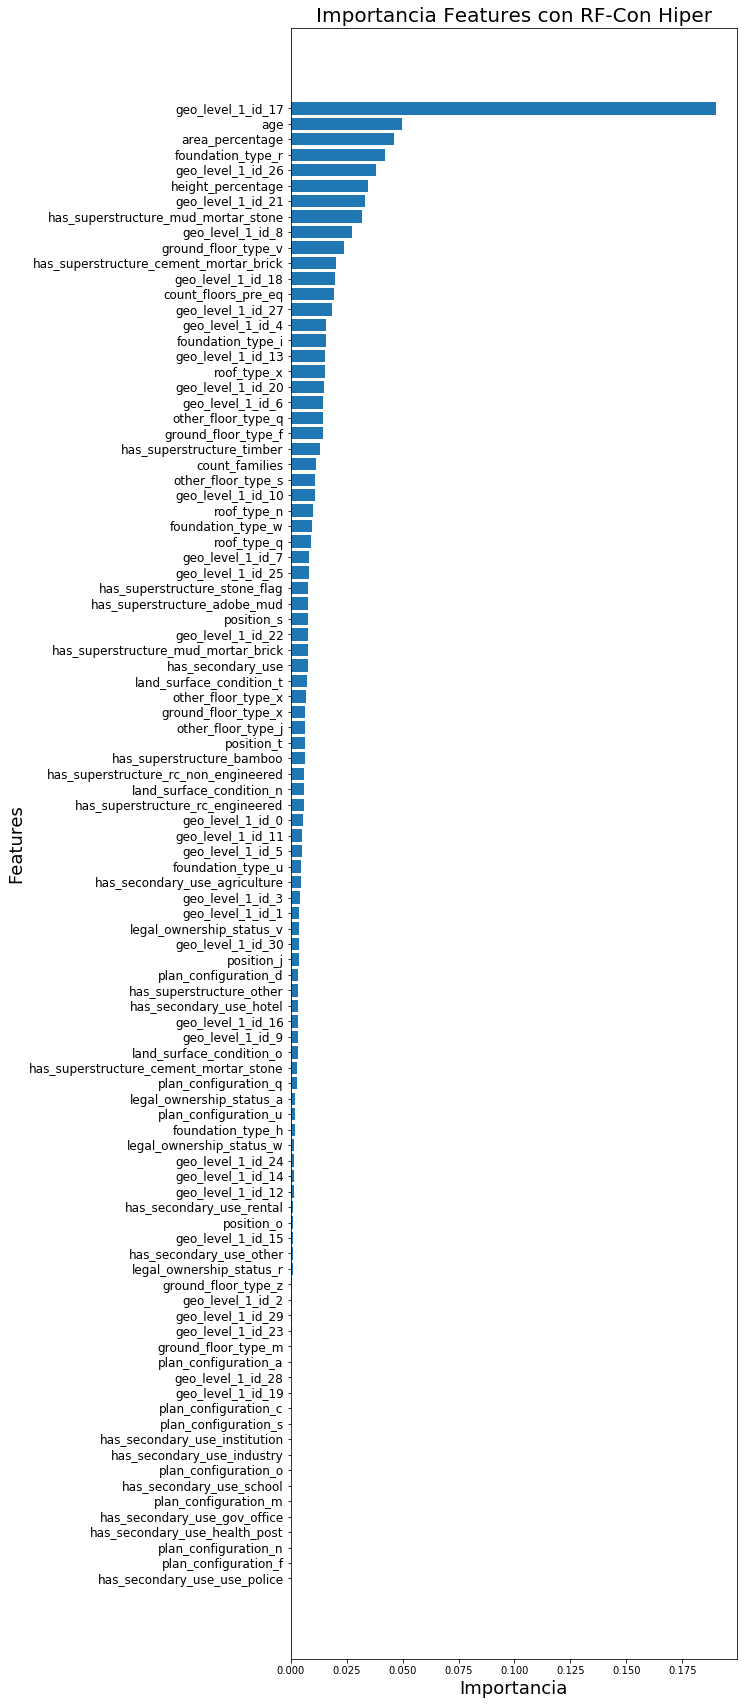

In [77]:
plt.figure(figsize=(8,30))
plt.barh(Grafico_fi2['Features'], Grafico_fi2['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con Hiper',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

#### Nos quedamos con los 25 más importantes

In [78]:
Grafico_fi2_top = Grafico_fi2.iloc[-25:,:]

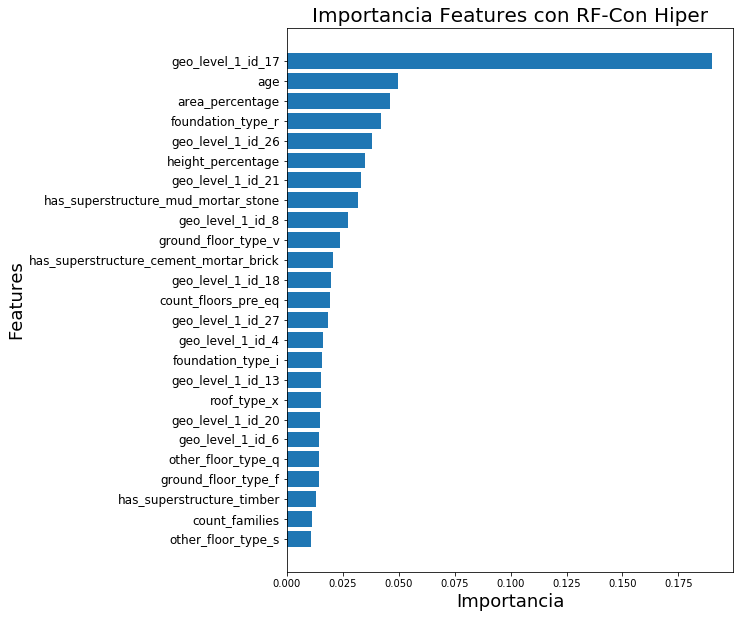

In [79]:
plt.figure(figsize=(8,10))
plt.barh(Grafico_fi2_top['Features'], Grafico_fi2_top['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con Hiper',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

### Competencia: Predict and Submit

In [80]:
test_values = pd.read_csv('./../datasets/test_values.csv')

#### Pre_procesamiento del set de test (competencia)

In [81]:
#Quitamos 'geo_level_2_id' y 'geo_level_3_id'
test_values = test_values.drop(['geo_level_2_id', 'geo_level_3_id'], axis=1)

#Pasamos 'geo_level_1_id' a Category y realizamos One-Hot Encoding de los datos de tipo category y object
test_values['geo_level_1_id'] = pd.Categorical(test_values['geo_level_1_id'])
test_values = pd.get_dummies(test_values)

# Quitamos el feature 'building_id'
test_values = test_values.iloc[:,1:]

test_values.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 96 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   count_floors_pre_eq                     86868 non-null  int64
 1   age                                     86868 non-null  int64
 2   area_percentage                         86868 non-null  int64
 3   height_percentage                       86868 non-null  int64
 4   has_superstructure_adobe_mud            86868 non-null  int64
 5   has_superstructure_mud_mortar_stone     86868 non-null  int64
 6   has_superstructure_stone_flag           86868 non-null  int64
 7   has_superstructure_cement_mortar_stone  86868 non-null  int64
 8   has_superstructure_mud_mortar_brick     86868 non-null  int64
 9   has_superstructure_cement_mortar_brick  86868 non-null  int64
 10  has_superstructure_timber               86868 non-null  int64
 11  has_superstruct

In [82]:
predictions = best_model.predict(test_values)

In [83]:
submission_format = pd.read_csv('./../datasets/submission_format.csv', index_col='building_id')

In [84]:
our_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [85]:
our_submission.head(2)

,damage_grade
building_id,
300051,3
99355,2


In [86]:
our_submission.to_csv('submission.csv')

In [87]:
!head submission.csv

building_id,damage_grade
300051,3
99355,2
890251,2
745817,1
421793,3
871976,2
691228,1
896100,3
343471,2


### Feature Engineering

In [88]:
RF_train_values.head(2)

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,damage_grade
0,2,30,6,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
1,2,10,8,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2


In [89]:
RF_train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 97 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   count_floors_pre_eq                     260601 non-null  int64
 1   age                                     260601 non-null  int64
 2   area_percentage                         260601 non-null  int64
 3   height_percentage                       260601 non-null  int64
 4   has_superstructure_adobe_mud            260601 non-null  int64
 5   has_superstructure_mud_mortar_stone     260601 non-null  int64
 6   has_superstructure_stone_flag           260601 non-null  int64
 7   has_superstructure_cement_mortar_stone  260601 non-null  int64
 8   has_superstructure_mud_mortar_brick     260601 non-null  int64
 9   has_superstructure_cement_mortar_brick  260601 non-null  int64
 10  has_superstructure_timber               260601 non-null  int64
 11  

### Agregamos features

### FE_1

In [90]:
# Definimos nuevo df y borramos geo level que no usamos
RF_train_values_FE_1 = df_train_values.drop(['geo_level_2_id', 'geo_level_3_id'], axis=1)

# Pasamos geo level 1 a 'categoy'
RF_train_values_FE_1['geo_level_1_id'] = pd.Categorical(RF_train_values_FE_1['geo_level_1_id'])

# Realizamos one-hot encoding a datos categoricos
RF_train_values_FE_1 = pd.get_dummies(RF_train_values_FE_1)

#### Trabajamos con los features geo_level_1 más importantes

In [91]:
RF_train_values_FE_1['geo_level_1_id_17'].value_counts()

0    238788
1     21813
Name: geo_level_1_id_17, dtype: int64

In [92]:
RF_train_values_FE_1['geo_level_1_id_26'].value_counts()

0    237986
1     22615
Name: geo_level_1_id_26, dtype: int64

In [93]:
RF_train_values_FE_1['geo_level_1_id_21'].value_counts()

0    245712
1     14889
Name: geo_level_1_id_21, dtype: int64

In [94]:
RF_train_values_FE_1['geo_level_1_id_8'].value_counts()

0    241521
1     19080
Name: geo_level_1_id_8, dtype: int64

In [95]:
RF_train_values_FE_1['AND_gl_17_26_21_8']= (RF_train_values_FE_1['geo_level_1_id_17'] |
                                            RF_train_values_FE_1['geo_level_1_id_26'] |
                                            RF_train_values_FE_1['geo_level_1_id_21'] |
                                            RF_train_values_FE_1['geo_level_1_id_8'] )  

In [96]:
RF_train_values_FE_1['AND_gl_17_26_21_8'].value_counts()

0    182204
1     78397
Name: AND_gl_17_26_21_8, dtype: int64

Probamos feature 'AND_gl_17_26_21_8'

In [97]:
# Agregamos labels
RF_train_values_FE_1 = RF_train_values_FE_1.merge(df_train_labels)

# Quitamos feature 'building_id'
RF_train_values_FE_1 = RF_train_values_FE_1.iloc[:,1:]

# Separamos la variable a predecir
X, y = RF_train_values_FE_1.iloc[:,:-1],RF_train_values_FE_1.iloc[:,-1]

# Separamos el set en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [98]:
#parameters_grid = { 'n_estimators': 77,
#                    'min_samples_split': 6,
#                    'min_samples_leaf': 3,
#                    'max_depth': 28}

In [99]:
parameters_grid = {'n_estimators':[70,74,78,82],
                   'max_depth':[25,28,30,35],
                   'min_samples_leaf':[3,4,5,6],
                   'min_samples_split':[4,5,6,7,8] }

In [100]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 35}

In [101]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [102]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6971795855717575

In [103]:
f1_score(y_test, preds, average='micro')

0.6968208591546593

#### Importancia de los features FE_1

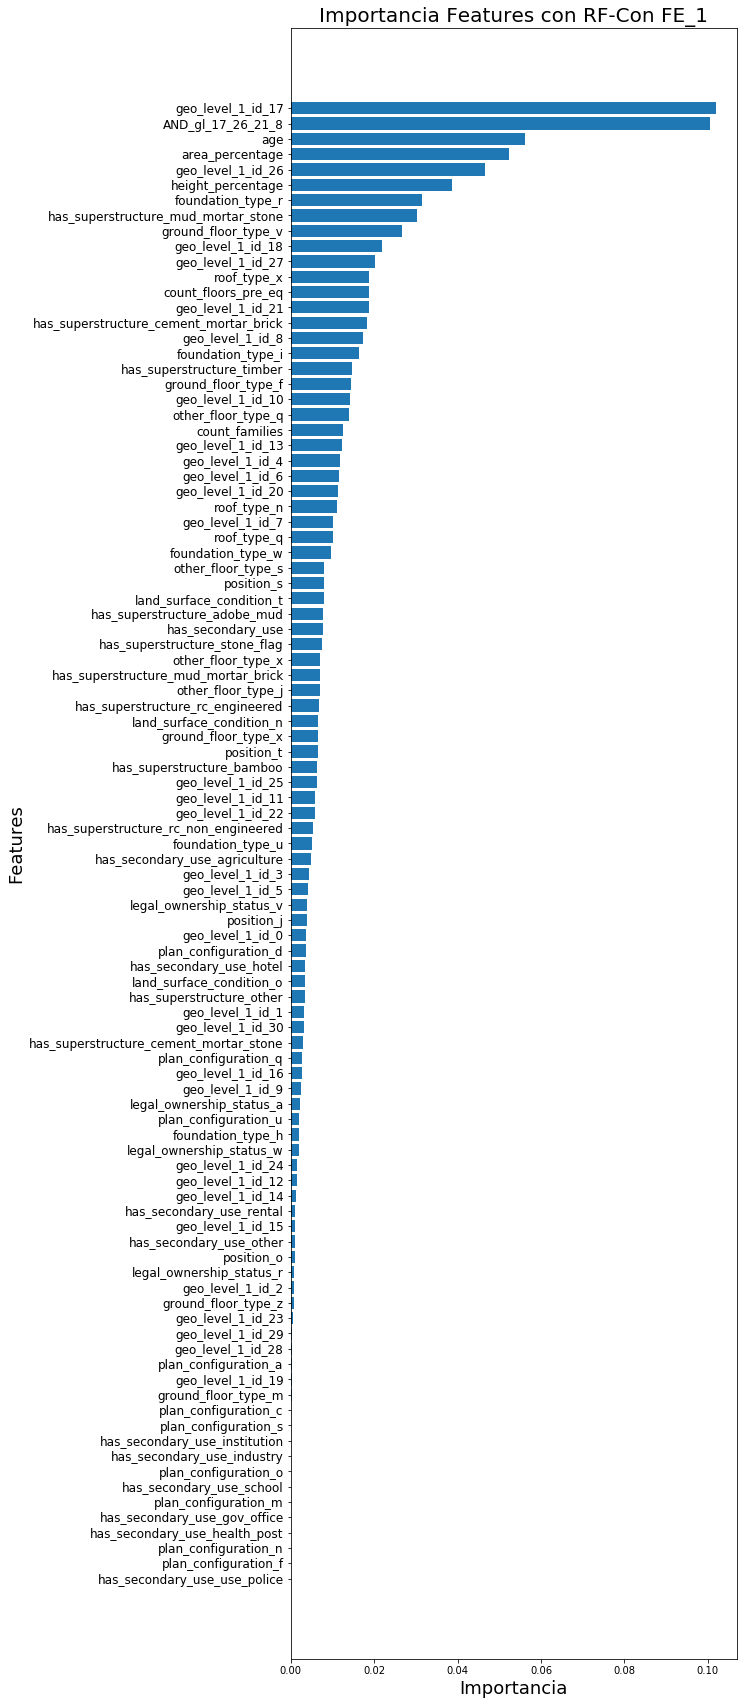

In [104]:
Grafico_fi = pd.DataFrame()
Grafico_fi['Features']=X_train.columns
Grafico_fi['Importancia']=best_model.feature_importances_
Grafico_fi = Grafico_fi.sort_values('Importancia')
plt.figure(figsize=(8,30))
plt.barh(Grafico_fi['Features'], Grafico_fi['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_1',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

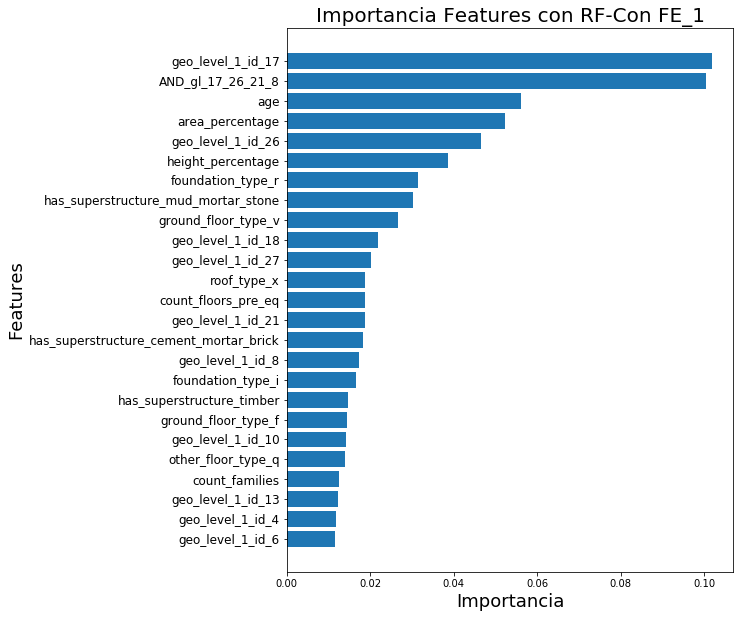

In [105]:
Grafico_fi_top = Grafico_fi.iloc[-25:,:]
plt.figure(figsize=(8,10))
plt.barh(Grafico_fi_top['Features'], Grafico_fi_top['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_1',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

#### FE_2

In [106]:
# Definimos nuevo df y borramos geo level que no usamos
RF_train_values_FE_2 = df_train_values.drop(['geo_level_2_id', 'geo_level_3_id'], axis=1)

# Pasamos geo level 1 a 'categoy'
RF_train_values_FE_2['geo_level_1_id'] = pd.Categorical(RF_train_values_FE_2['geo_level_1_id'])

# Realizamos one-hot encoding a datos categoricos
RF_train_values_FE_2 = pd.get_dummies(RF_train_values_FE_2)

#### Trabajamos con los features 'age', 'area_percentage' y 'height_percentage'

In [107]:
RF_train_values_FE_2['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [108]:
RF_train_values_FE_2['area_percentage'].value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
82         1
80         1
78         1
75         1
100        1
Name: area_percentage, Length: 84, dtype: int64

In [109]:
RF_train_values_FE_2['height_percentage'].value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64

In [110]:
RF_train_values_FE_2['Age_height_perc_area_perc']=                                \
    (RF_train_values_FE_2['age'] / RF_train_values_FE_2['height_percentage'])*    \
    RF_train_values_FE_2['area_percentage']

(age /height_percentage)*area_percentage

In [111]:
RF_train_values_FE_2['Age_height_perc_area_perc'].describe()

count    260601.000000
mean         40.172277
std         138.907000
min           0.000000
25%          10.000000
50%          22.500000
75%          41.666667
max        8955.000000
Name: Age_height_perc_area_perc, dtype: float64

Probamos feature 'Age_height_perc_area_perc'

In [112]:
# Agregamos labels
RF_train_values_FE_2 = RF_train_values_FE_2.merge(df_train_labels)

# Quitamos feature 'building_id'
RF_train_values_FE_2 = RF_train_values_FE_2.iloc[:,1:]

# Separamos la variable a predecir
X, y = RF_train_values_FE_2.iloc[:,:-1],RF_train_values_FE_2.iloc[:,-1]

# Separamos el set en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [113]:
#parameters_grid = { 'n_estimators': 77,
#                    'min_samples_split': 6,
#                    'min_samples_leaf': 3,
#                    'max_depth': 28}

In [114]:
parameters_grid = {'n_estimators':[70,74,78,82],
                   'max_depth':[25,28,30,35],
                   'min_samples_leaf':[3,4,5,6],
                   'min_samples_split':[4,5,6,7,8] }

In [115]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 82,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 28}

In [116]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [117]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6937356101304681

In [118]:
f1_score(y_test, preds, average='micro')

0.6923888643732853

#### Importancia de los features FE_2

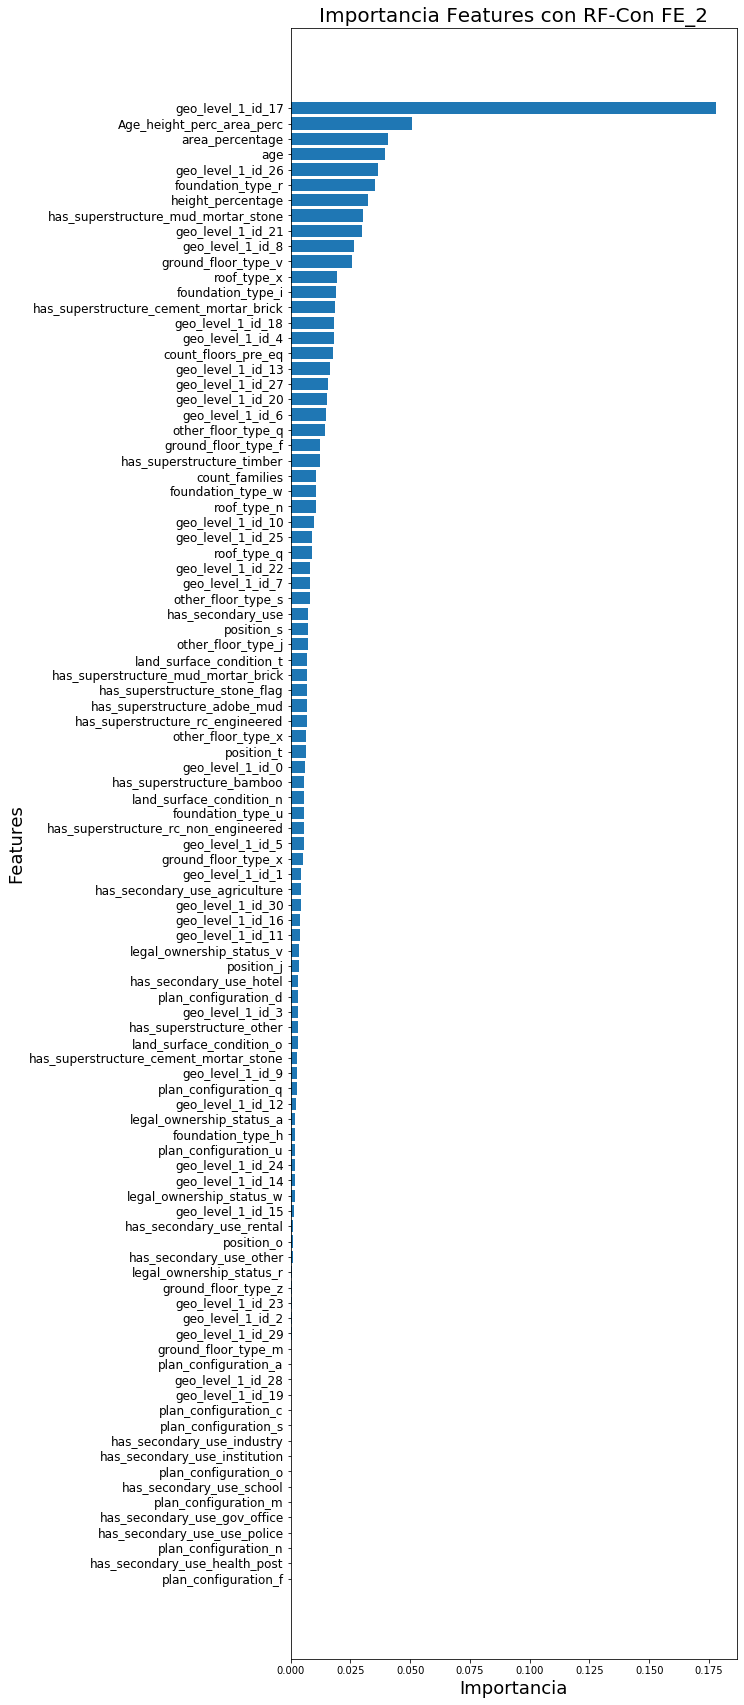

In [119]:
Grafico_fi = pd.DataFrame()
Grafico_fi['Features']=X_train.columns
Grafico_fi['Importancia']=best_model.feature_importances_
Grafico_fi = Grafico_fi.sort_values('Importancia')
plt.figure(figsize=(8,30))
plt.barh(Grafico_fi['Features'], Grafico_fi['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_2',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

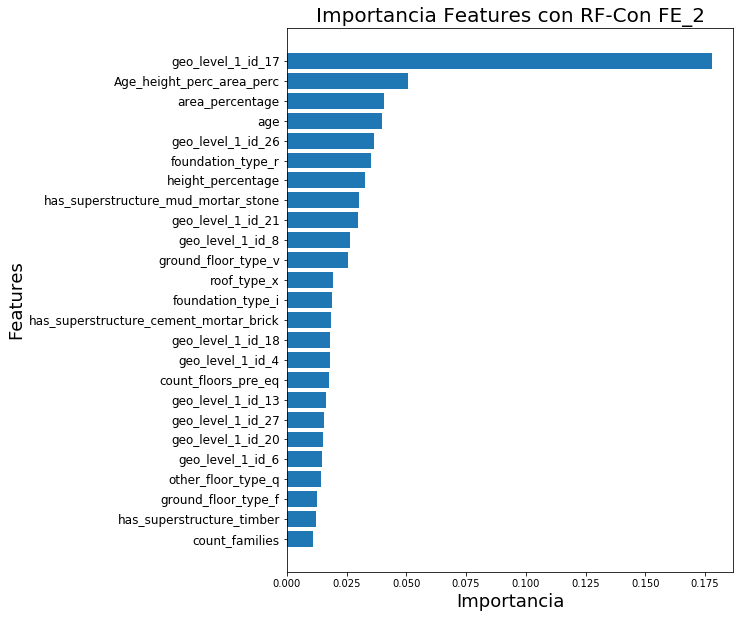

In [120]:
Grafico_fi_top = Grafico_fi.iloc[-25:,:]
plt.figure(figsize=(8,10))
plt.barh(Grafico_fi_top['Features'], Grafico_fi_top['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_2',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

#### FE_3

In [121]:
# Definimos nuevo df y borramos geo level que no usamos
RF_train_values_FE_3 = df_train_values.drop(['geo_level_2_id', 'geo_level_3_id'], axis=1)

# Pasamos geo level 1 a 'categoy'
RF_train_values_FE_3['geo_level_1_id'] = pd.Categorical(RF_train_values_FE_3['geo_level_1_id'])

# Realizamos one-hot encoding a datos categoricos
RF_train_values_FE_3 = pd.get_dummies(RF_train_values_FE_3)

#### Trabajamos con los features 'foundation_type_r', 'has_superstructure_mud_mortar_stone' y 'ground_floor_type_v'

In [122]:
RF_train_values_FE_3['foundation_type_r'].value_counts()

1    219196
0     41405
Name: foundation_type_r, dtype: int64

In [123]:
RF_train_values_FE_3['has_superstructure_mud_mortar_stone'].value_counts()

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

In [124]:
RF_train_values_FE_3['ground_floor_type_v'].value_counts()

0    236008
1     24593
Name: ground_floor_type_v, dtype: int64

In [125]:
RF_train_values_FE_3['Found_r_Super_stone_Ground_v']=                    \
    (RF_train_values_FE_3['foundation_type_r'] ^                         \
     RF_train_values_FE_3['has_superstructure_mud_mortar_stone']) |      \
    RF_train_values_FE_3['ground_floor_type_v']

(foundation_type_r XOR has_superstructure_mud_mortar_stone) OR ground_floor_type_v

In [126]:
RF_train_values_FE_3['Found_r_Super_stone_Ground_v'].value_counts()

0    200467
1     60134
Name: Found_r_Super_stone_Ground_v, dtype: int64

Probamos feature 'Found_r_Super_stone_Ground_v'

In [127]:
# Agregamos labels
RF_train_values_FE_3 = RF_train_values_FE_3.merge(df_train_labels)

# Quitamos feature 'building_id'
RF_train_values_FE_3 = RF_train_values_FE_3.iloc[:,1:]

# Separamos la variable a predecir
X, y = RF_train_values_FE_3.iloc[:,:-1],RF_train_values_FE_3.iloc[:,-1]

# Separamos el set en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [128]:
#parameters_grid = { 'n_estimators': 77,
#                    'min_samples_split': 6,
#                    'min_samples_leaf': 3,
#                    'max_depth': 28}

In [129]:
parameters_grid = {'n_estimators':[70,74,78,82],
                   'max_depth':[25,28,30,35],
                   'min_samples_leaf':[3,4,5,6],
                   'min_samples_split':[4,5,6,7,8] }

In [130]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 82,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [131]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [132]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.69502110514198

In [133]:
f1_score(y_test, preds, average='micro')

0.6942882907081599

#### Importancia de los features FE_3

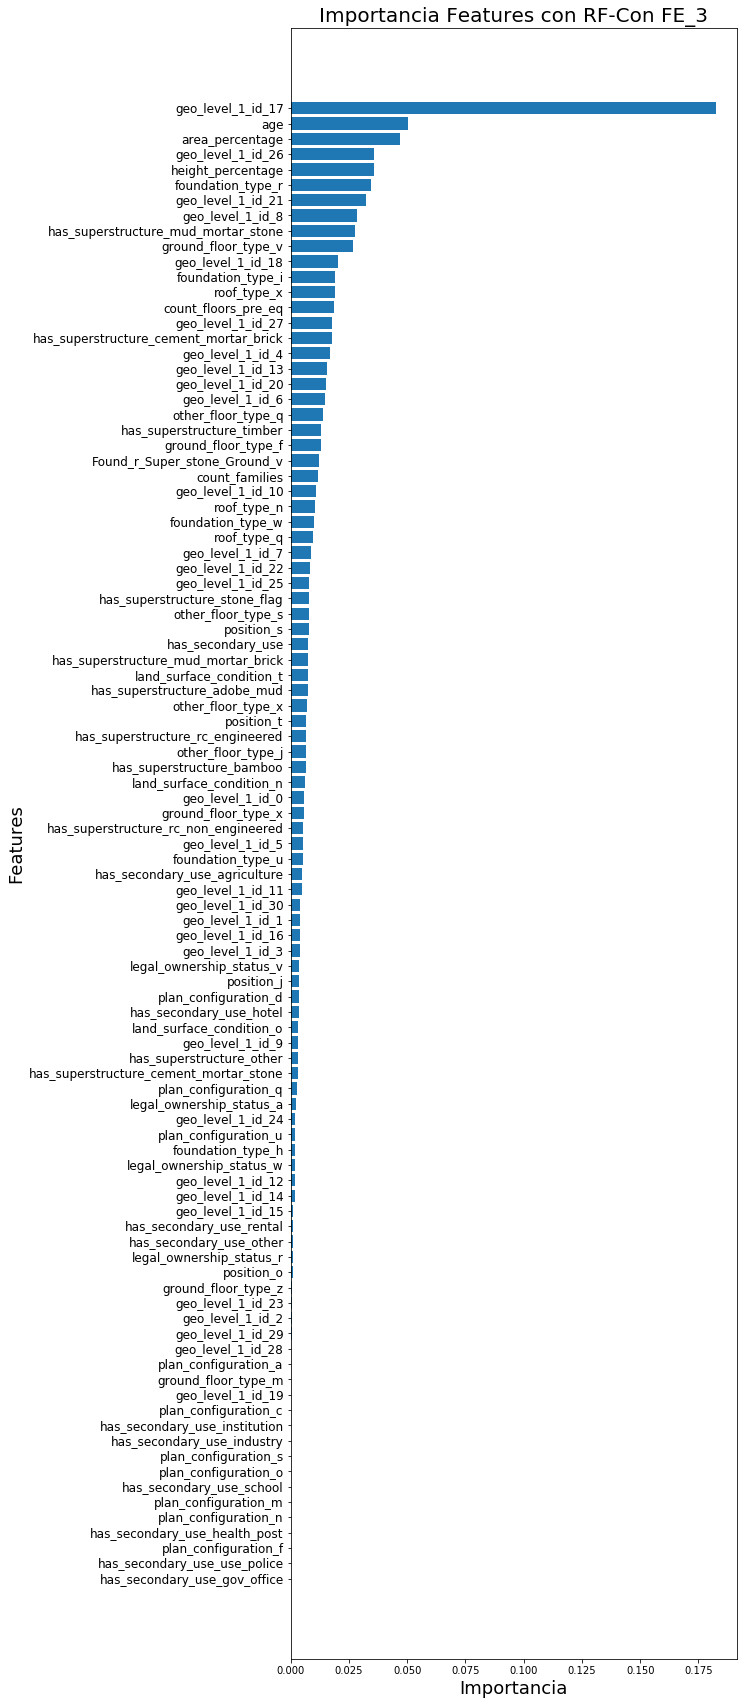

In [134]:
Grafico_fi = pd.DataFrame()
Grafico_fi['Features']=X_train.columns
Grafico_fi['Importancia']=best_model.feature_importances_
Grafico_fi = Grafico_fi.sort_values('Importancia')
plt.figure(figsize=(8,30))
plt.barh(Grafico_fi['Features'], Grafico_fi['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_3',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

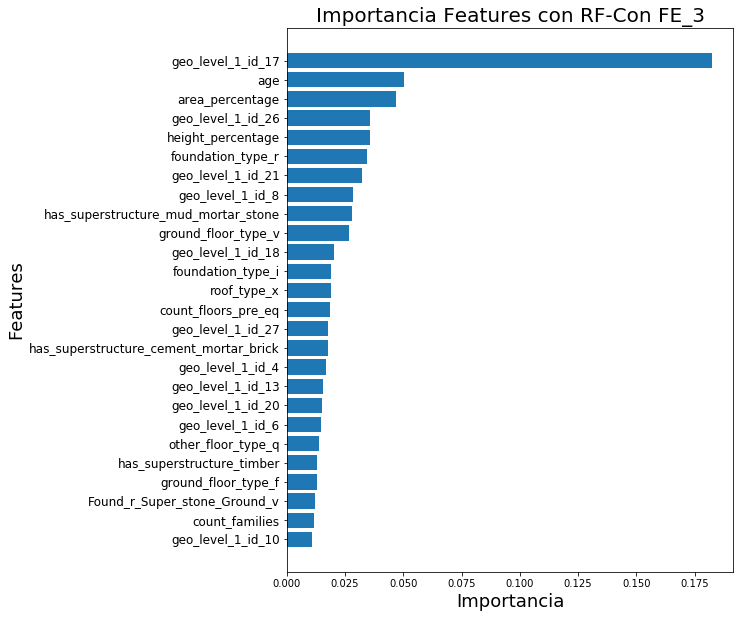

In [135]:
Grafico_fi_top = Grafico_fi.iloc[-26:,:]
plt.figure(figsize=(8,10))
plt.barh(Grafico_fi_top['Features'], Grafico_fi_top['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_3',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

#### FE_4

In [136]:
# Definimos nuevo df y borramos geo level que no usamos
RF_train_values_FE_4 = df_train_values.drop(['geo_level_2_id', 'geo_level_3_id'], axis=1)

# Pasamos geo level 1 a 'categoy'
RF_train_values_FE_4['geo_level_1_id'] = pd.Categorical(RF_train_values_FE_4['geo_level_1_id'])

# Realizamos one-hot encoding a datos categoricos
RF_train_values_FE_4 = pd.get_dummies(RF_train_values_FE_4)

Probamos los 3 features nuevos juntos, 'AND_gl_17_26_21_8', 'Age_height_perc_area_perc' y
'Found_r_Super_stone_Ground_v'

In [137]:
RF_train_values_FE_4['AND_gl_17_26_21_8']= RF_train_values_FE_1['AND_gl_17_26_21_8']

In [138]:
RF_train_values_FE_4['Age_height_perc_area_perc']= RF_train_values_FE_2['Age_height_perc_area_perc']

In [139]:
RF_train_values_FE_4['Found_r_Super_stone_Ground_v']= RF_train_values_FE_3['Found_r_Super_stone_Ground_v']

In [140]:
# Agregamos labels
RF_train_values_FE_4 = RF_train_values_FE_4.merge(df_train_labels)

# Quitamos feature 'building_id'
RF_train_values_FE_4 = RF_train_values_FE_4.iloc[:,1:]

# Separamos la variable a predecir
X, y = RF_train_values_FE_4.iloc[:,:-1],RF_train_values_FE_4.iloc[:,-1]

# Separamos el set en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [141]:
#parameters_grid = { 'n_estimators': 77,
#                    'min_samples_split': 6,
#                    'min_samples_leaf': 3,
#                    'max_depth': 28}

In [142]:
parameters_grid = {'n_estimators':[70,74,78,82],
                   'max_depth':[25,28,30,35],
                   'min_samples_leaf':[3,4,5,6],
                   'min_samples_split':[4,5,6,7,8] }

In [143]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 82,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [144]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [145]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6956350729086723

In [146]:
f1_score(y_test, preds, average='micro')

0.6953627136854627

#### Importancia de los features FE_4

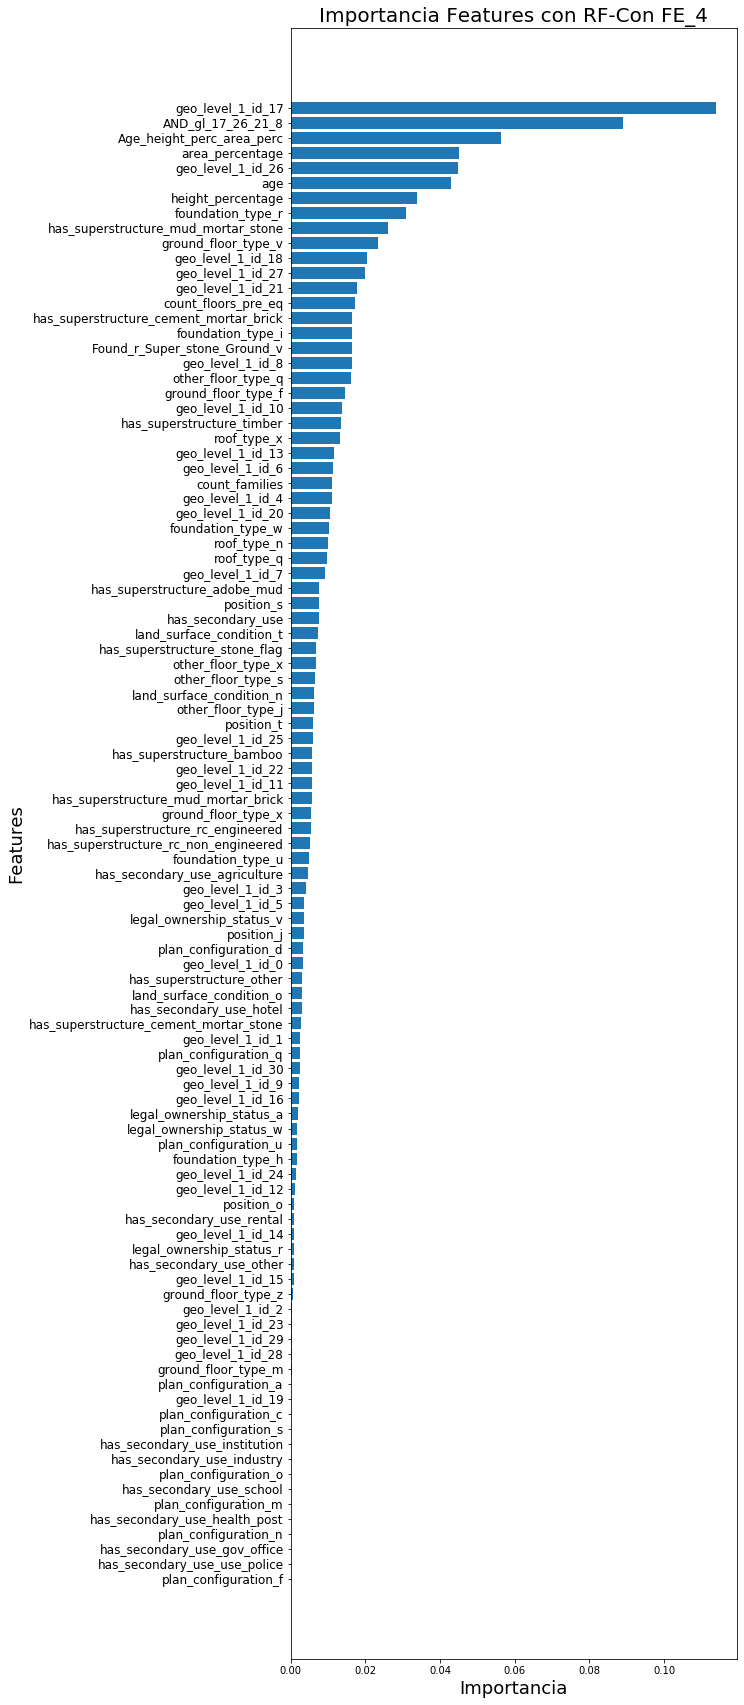

In [147]:
Grafico_fi = pd.DataFrame()
Grafico_fi['Features']=X_train.columns
Grafico_fi['Importancia']=best_model.feature_importances_
Grafico_fi = Grafico_fi.sort_values('Importancia')
plt.figure(figsize=(8,30))
plt.barh(Grafico_fi['Features'], Grafico_fi['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_4',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

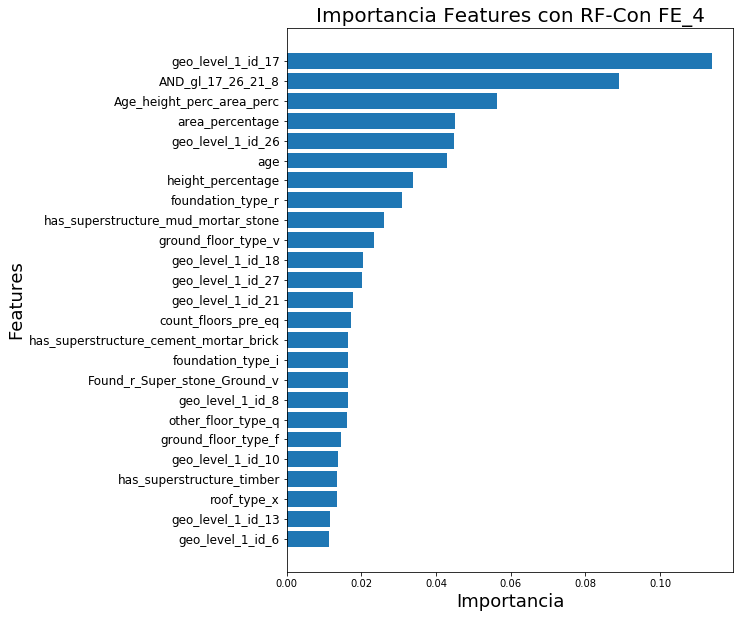

In [148]:
Grafico_fi_top = Grafico_fi.iloc[-25:,:]
plt.figure(figsize=(8,10))
plt.barh(Grafico_fi_top['Features'], Grafico_fi_top['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_4',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

#### FE_5

In [157]:
# Definimos nuevo df y borramos geo level que no usamos
RF_train_values_FE_5 = df_train_values.drop(['geo_level_2_id', 'geo_level_3_id'], axis=1)

# Pasamos geo level 1 a 'categoy'
RF_train_values_FE_5['geo_level_1_id'] = pd.Categorical(RF_train_values_FE_5['geo_level_1_id'])

# Realizamos one-hot encoding a datos categoricos
RF_train_values_FE_5 = pd.get_dummies(RF_train_values_FE_5)

Mejores resultados de Hiper-parámetros (A3) y FE (FE1)

In [158]:
RF_train_values_FE_5['AND_gl_17_26_21_8']= RF_train_values_FE_1['AND_gl_17_26_21_8']

In [159]:
# Agregamos labels
RF_train_values_FE_5 = RF_train_values_FE_5.merge(df_train_labels)

# Quitamos feature 'building_id'
RF_train_values_FE_5 = RF_train_values_FE_5.iloc[:,1:]

# Separamos la variable a predecir
X, y = RF_train_values_FE_5.iloc[:,:-1],RF_train_values_FE_5.iloc[:,-1]

# Separamos el set en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [160]:
parameters_grid ={'n_estimators': [69,70,71],
 'min_samples_split': [7,8,9],
 'min_samples_leaf': [2,3,4],
 'max_depth': [25,30,35]}

In [161]:
rs = RandomizedSearchCV(rf_model,parameters_grid,cv=5,scoring='f1_micro',n_iter=5)
fit_rs = rs.fit(X_train, y_train)
fit_rs.best_params_

{'n_estimators': 70,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [162]:
best_model= fit_rs.best_estimator_
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

In [163]:
scores=cross_val_score(best_model, X_train, y_train,cv=5,scoring='f1_micro')
scores.mean()

0.6973762471220261

In [164]:
f1_score(y_test, preds, average='micro')

0.6961301586692504

#### Importancia de los features FE_4

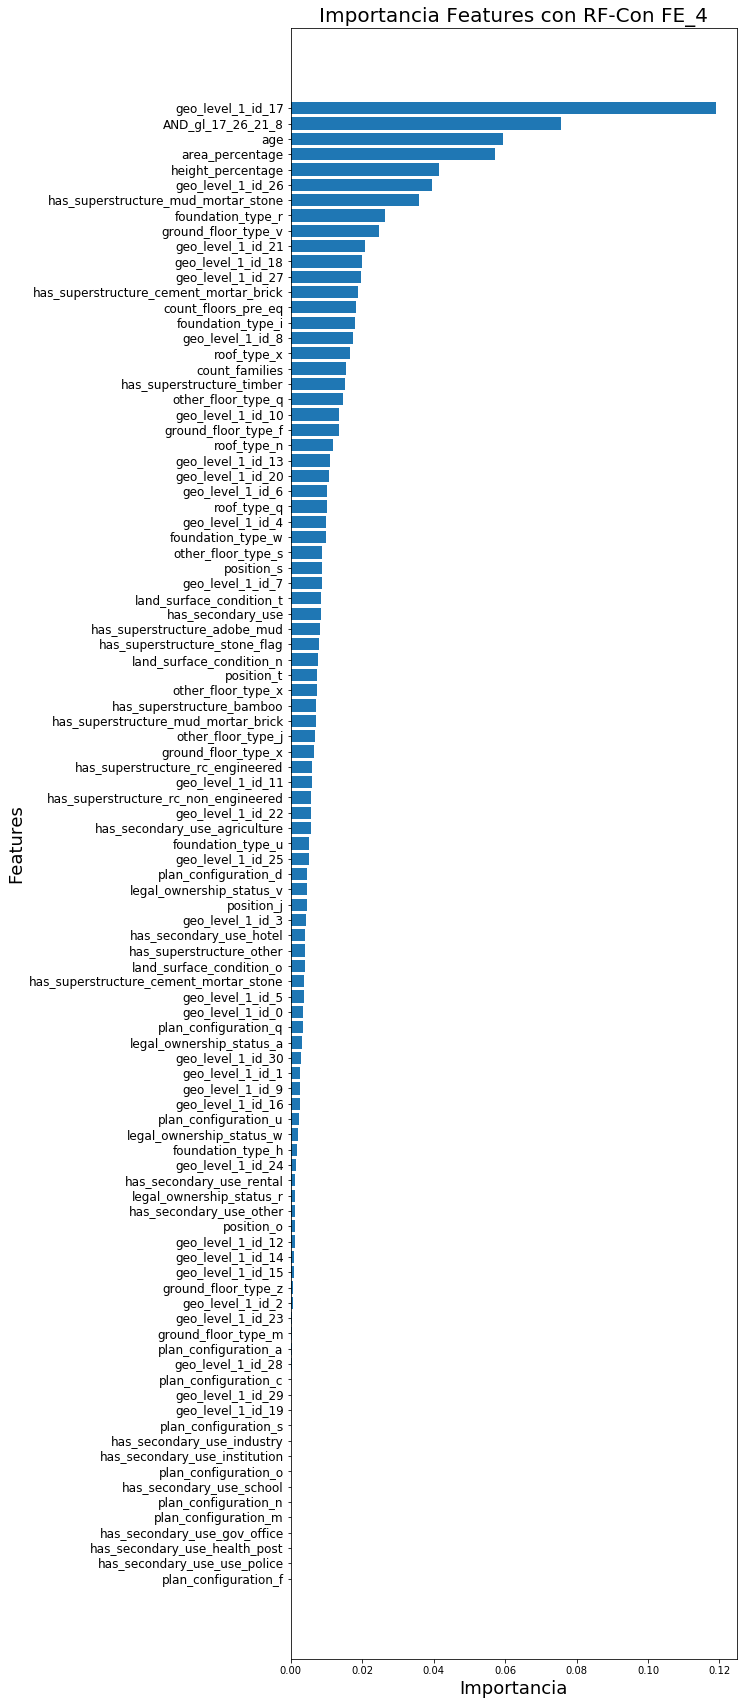

In [165]:
Grafico_fi = pd.DataFrame()
Grafico_fi['Features']=X_train.columns
Grafico_fi['Importancia']=best_model.feature_importances_
Grafico_fi = Grafico_fi.sort_values('Importancia')
plt.figure(figsize=(8,30))
plt.barh(Grafico_fi['Features'], Grafico_fi['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_4',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

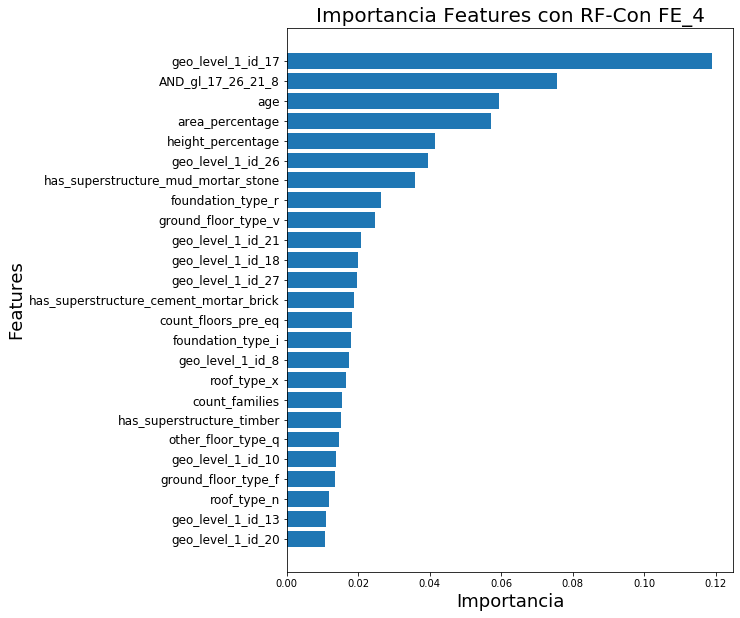

In [166]:
Grafico_fi_top = Grafico_fi.iloc[-25:,:]
plt.figure(figsize=(8,10))
plt.barh(Grafico_fi_top['Features'], Grafico_fi_top['Importancia'])
plt.ylabel('Features',fontsize=18)
plt.xlabel('Importancia',fontsize=18)
plt.title('Importancia Features con RF-Con FE_4',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

#### Best test score:
0.6961301586692504